In [1]:
from myModel.resNet import *
import pandas as pd

In [2]:
model = FineTunedModel()
x_train, x_test, y_train, y_test = model.split_data()

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.7656 - accuracy: 0.5385
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 0.0252 - accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 1s 1s/step - loss: 0.0017 - accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 8.4387e-04 - accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 5.1688e-04 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 1s 1s/step - loss: 6.1529e-04 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 1s 1s/step - loss: 1.1876e-04 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 1s 1s/step - loss: 1.0882e-04 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 1s 1s/step - loss: 1.2196e-04 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 1s 1s/step - loss: 1.3181e-04 - accuracy: 1.0000
Epoch 11/20
1/1 [====

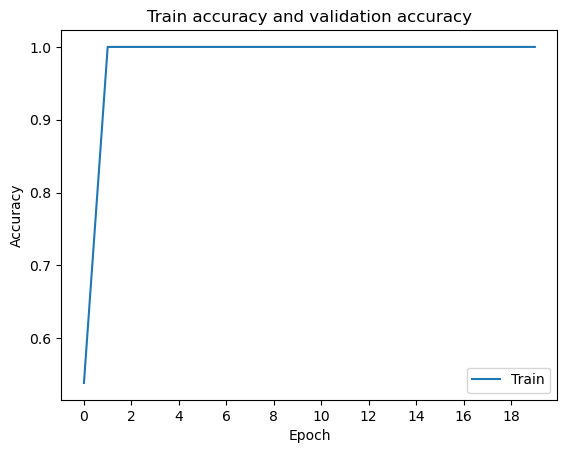

In [3]:
model.train(x_train, y_train)

In [4]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 1s 501ms/step - loss: 85.4250 - accuracy: 0.3333
Loss: 85.4250259399414, Accuracy: 0.3333333432674408


In [5]:
output_path = './dataset/test_resnet_submission.csv'
test_candidates_data = pd.read_csv('./dataset/small_test_candidates.csv')

model.predict(test_candidates_data, output_path)

Processing row:  0
1/1 [==============================] - 0s 48ms/step
Time elapsed: 1.537977933883667; 
Processing row:  1
1/1 [==============================] - 0s 48ms/step
Time elapsed: 1.2434139251708984; 
Processing row:  2
1/1 [==============================] - 0s 49ms/step
Time elapsed: 1.2368221282958984; 
Processing row:  3
1/1 [==============================] - 0s 48ms/step
Time elapsed: 1.246260166168213; 
Processing row:  4
1/1 [==============================] - 0s 51ms/step
Time elapsed: 1.2517600059509277; 
Processing row:  5
1/1 [==============================] - 0s 49ms/step
Time elapsed: 1.2417936325073242; 
Processing row:  6
1/1 [==============================] - 0s 48ms/step
Time elapsed: 1.2382020950317383; 
Processing row:  7
1/1 [==============================] - 0s 47ms/step
Time elapsed: 1.2332079410552979; 
Processing row:  8
1/1 [==============================] - 0s 48ms/step
Time elapsed: 1.2488939762115479; 


,left,c0,c1,c2,c3,c4,c5,c6,c7,c8,...,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19
0,abm,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999997,1.0
1,aci,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.462641,1.0,0.767526,1.0,1.0,1.0,1.0
2,acn,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.960428
3,aco,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,acu,1.0,1.0,1.0,1.0,1.0,0.970606,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.998075,1.0,1.0,0.99999
5,acw,0.609084,1.0,1.0,0.991813,0.768747,0.997576,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.843035,1.0,1.0
6,adt,1.0,0.999997,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999999,1.0
7,aei,0.999709,1.0,1.0,1.0,1.0,1.0,1.0,0.000418,1.0,...,1.0,1.0,0.999984,0.000543,1.0,1.0,1.0,1.0,1.0,1.0
8,aej,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.999932,1.0,1.0,1.0,1.0,1.0,1.0
